In [461]:
import pandas as pd
import skbio
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px


In [462]:
ViralHosts = pd.read_csv('HostViralFinal.tsv', sep='\t', index_col=0, dtype={'PROTISTS': 'int',	'PROKARYOTES': 'int', 'INVERTEBRATES': 'int', 'VERTEBRATES': 'int', 'PLANTS':'int', 'FUNGI':'int',	'VIROPHAGE': 'int'})
viromeDF = pd.read_csv('final_virome_df.tsv', sep='\t')
readCounts = pd.read_csv('total_reads_kaiju.csv', names=['Reads', 'Run']).astype({'Reads': 'int', 'Run': 'str'})

In [463]:
noPhagesDF = ViralHosts.loc[((ViralHosts['PROKARYOTES'] == 1) & ((ViralHosts['VERTEBRATES'] == 1) | (ViralHosts['INVERTEBRATES'] == 1) | (ViralHosts['PROTISTS'] == 1) | (ViralHosts['PLANTS'] == 1) | (ViralHosts['FUNGI'] == 1))) |\
               ((ViralHosts['PROKARYOTES'] == 0) & ((ViralHosts['VERTEBRATES'] == 1) | (ViralHosts['INVERTEBRATES'] == 1) | (ViralHosts['PROTISTS'] == 1) | (ViralHosts['PLANTS'] == 1) | (ViralHosts['FUNGI'] == 1)))]
noPhagesFamilies = noPhagesDF.index.tolist()
    

In [464]:
statsDF = viromeDF[['species', 'Run'] + noPhagesFamilies].merge(readCounts, left_on='Run', right_on='Run').fillna(0).astype(int, errors='ignore')

In [465]:
statDF_T = statsDF[['Run'] + noPhagesFamilies].transpose()


statDF_T.rename(columns=statDF_T.iloc[0], inplace=True)

statDF_T.drop(statDF_T.index[0], inplace=True)
runRichness = {}
runShannon = {}
for i in statDF_T.columns:
    if sum(statDF_T[i].astype(int)) > 0:
        
        runRichness[i] = skbio.diversity.alpha.margalef(statDF_T[i].astype(int)).item()
        runShannon[i] = skbio.diversity.alpha.shannon(statDF_T[i].astype(int), base=None, exp=False).item()


runRichness = pd.DataFrame(runRichness, index=['Richness']).transpose()
runShannon = pd.DataFrame(runShannon, index=['Shannon']).transpose()

viromeDF = viromeDF.merge(runRichness, left_on='Run', right_index=True).merge(runShannon, left_on='Run', right_index=True)

In [466]:
RhizocephalaRichness = viromeDF[viromeDF['infraclass'] == 'Rhizocephala']['Richness']
RhizocephalShannon = viromeDF[viromeDF['infraclass'] == 'Rhizocephala']['Shannon']

ThoracicaRichness = viromeDF[viromeDF['infraclass'] == 'Thoracica']['Richness']
ThoracicaShannon = viromeDF[viromeDF['infraclass'] == 'Thoracica']['Shannon']


In [467]:
fig = px.box(viromeDF, x='infraclass', y="Shannon", color='infraclass', points='all',)
fig.show()

In [468]:
fig = px.box(viromeDF, x='infraclass', y="Richness", color='infraclass', points='all',)
fig.show()

In [469]:

import pingouin as pg


hmos = pg.homoscedasticity(viromeDF, dv='Shannon', group='infraclass', method='levene', alpha=0.05)
hmos


,W,pval,equal_var
levene,3.454949,0.073604,True


In [470]:
aov = pg.anova(dv='Shannon', between='infraclass', data=viromeDF)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,infraclass,1,28,0.828945,0.370349,0.028754


In [471]:
statDF_T.transpose()

,Artiviridae,Retroviridae,Iridoviridae,Nimaviridae,Hepadnaviridae,Papillomaviridae,Polydnaviriformidae,Nairoviridae,Tombusviridae,Orthoherpesviridae,...,Bidnaviridae,Kolmioviridae,Alternaviridae,Alvernaviridae,Partitiviridae,Cremegaviridae,Tospoviridae,Megabirnaviridae,Mayoviridae,Aspiviridae
DRR277134,0,14455,5997,63,1,328,7963,857,0,1287,...,0,0,0,0,0,0,0,0,0,1
DRR311751,0,3919,1797,231,0,12,2480,223,5,1161,...,0,0,0,0,0,0,0,0,0,0
DRR345795,5,1448,1876,43,4,17,1062,136,1,322,...,0,0,22,0,0,0,0,0,0,0
SRR426837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR2921281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR4113502,7,1123,1681,24,36,34,979,50,1,565,...,0,0,0,0,0,0,0,0,0,0
SRR5140130,0,2583,752,2,2,16,1501,69,0,363,...,0,0,0,0,0,0,0,0,0,0
SRR5140107,0,196,149,0,0,18,266,19,0,66,...,0,0,0,0,0,0,0,0,0,0
SRR5140144,0,951,1838,14,141,6,963,174,0,839,...,0,0,0,0,0,0,3,1,0,0
SRR5198727,0,6022,3899,96,0,3,1039,181,0,5065,...,0,0,0,0,0,0,0,0,0,0


In [472]:
## same analysis but for genus level

viromeDF = pd.read_csv('final_virome_df_genus.tsv', sep='\t')
ViralGenus = list(viromeDF.columns[20:])

statsDF_genus = viromeDF[['species', 'Run'] + ViralGenus].merge(readCounts, left_on='Run', right_on='Run').fillna(0).astype(int, errors='ignore')


statDF_T = statsDF_genus[['Run'] + ViralGenus].transpose()


statDF_T.rename(columns=statDF_T.iloc[0], inplace=True)

statDF_T.drop(statDF_T.index[0], inplace=True)
runRichness = {}
runShannon = {}
for i in statDF_T.columns:
    if sum(statDF_T[i].astype(int)) > 0:
        
        runRichness[i] = skbio.diversity.alpha.margalef(statDF_T[i].astype(int)).item()
        runShannon[i] = skbio.diversity.alpha.shannon(statDF_T[i].astype(int), base=None, exp=False).item()


runRichness = pd.DataFrame(runRichness, index=['Richness']).transpose()
runShannon = pd.DataFrame(runShannon, index=['Shannon']).transpose()

viromeDF = viromeDF.merge(runRichness, left_on='Run', right_index=True).merge(runShannon, left_on='Run', right_index=True)


RhizocephalaRichness = viromeDF[viromeDF['infraclass'] == 'Rhizocephala']['Richness']
RhizocephalShannon = viromeDF[viromeDF['infraclass'] == 'Rhizocephala']['Shannon']

ThoracicaRichness = viromeDF[viromeDF['infraclass'] == 'Thoracica']['Richness']
ThoracicaShannon = viromeDF[viromeDF['infraclass'] == 'Thoracica']['Shannon']


In [473]:
fig = px.box(viromeDF, x='infraclass', y="Shannon", color='infraclass', points='all',)
fig.show()

In [474]:
fig = px.box(viromeDF, x='infraclass', y="Richness", color='infraclass', points='all',)
fig.show()

In [475]:

import pingouin as pg


hmos = pg.homoscedasticity(viromeDF, dv='Richness', group='infraclass', method='levene', alpha=0.05)
hmos

,W,pval,equal_var
levene,0.000317,0.985919,True


In [476]:

hmos = pg.homoscedasticity(viromeDF, dv='Richness', group='infraclass', method='levene', alpha=0.05)
hmos

,W,pval,equal_var
levene,0.000317,0.985919,True


In [477]:
aov_richness = pg.anova(dv='Richness', between='infraclass', data=viromeDF)
aov_richness

,Source,ddof1,ddof2,F,p-unc,np2
0,infraclass,1,28,6.278849,0.018307,0.18317


In [478]:
aov_shannon = pg.welch_anova(dv='Shannon', between='infraclass', data=viromeDF)
aov_shannon

,Source,ddof1,ddof2,F,p-unc,np2
0,infraclass,1,4.106549,1.455873,0.292465,0.181173


In [479]:
## add line with total viral reads
# this is the sum of all viral reads in the genus level
viromeDF.insert(len(viromeDF.columns), 'total_viral_reads', viromeDF[ViralGenus].sum(axis='columns'))


In [480]:
viromeDF_relative = viromeDF[ViralGenus + ['total_viral_reads']]
viromeDF_relative = viromeDF_relative.apply(lambda x : x / x['total_viral_reads'] * 100, axis=1) # This is porcentage of viral reads
virome_relative_pseudocount = viromeDF_relative.replace(0.0, 0.0000000001) # uses a pseudocount strategy to run clr

In [481]:
viromeDF.set_index('Run').index

Index(['DRR277134', 'DRR311751', 'DRR345795', 'SRR4113502', 'SRR5140130',
       'SRR5140107', 'SRR5140144', 'SRR5198727', 'SRR5832119', 'SRR6327827',
       'SRR6818896', 'SRR7594090', 'SRR8486073', 'SRR10527303', 'SRR10523768',
       'SRR10995811', 'SRR12539558', 'SRR13051591', 'SRR13580929',
       'SRR13557739', 'SRR13528008', 'SRR23490783', 'SRR13164554',
       'SRR13169468', 'SRR13169467', 'SRR13523349', 'SRR13518267',
       'SRR14354747', 'SRR17651134', 'SRR23562286', 'SRR23562283',
       'SRR31412042'],
      dtype='object', name='Run')

In [482]:
import numpy as np
from skbio.stats.composition import clr

viromeDF_relative_clr = clr(virome_relative_pseudocount[ViralGenus])
viromeDF_relative_clr = pd.DataFrame(viromeDF_relative_clr, columns=ViralGenus)
viromeDF_relative_clr.insert(0, 'Run', list(viromeDF.set_index('Run').index)) # makes sure that runs are added
viromeDF_relative_clr.insert(0, 'species', list(viromeDF.set_index('species').index)) # makes sure that runs are added
viromeDF_relative_clr.insert(0, 'infraclass', list(viromeDF.set_index('infraclass').index)) # makes sure that runs are added

viromeDF_relative_clr



,infraclass,species,Run,Whispovirus,Emdodecavirus,Capripoxvirus,Elanorvirus,Immutovirus,Heverleevirus,Rockvillevirus,...,Amalgavirus,Longwoodvirus,Corgivirus,Foetvirus,Faunusvirus,Metaavulavirus,Duonihilunusvirus,Sholavirus,Babuvirus,Felispumavirus
0,Thoracica,Megabalanus rosa,DRR277134,15.227167,16.004013,15.194906,-3.205806,11.084033,15.572669,-3.205806,...,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806,-3.205806
1,Rhizocephala,Sacculina polygenea,DRR311751,16.747992,11.305574,14.138788,-3.275441,16.032962,16.892823,-3.275441,...,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441,-3.275441
2,Thoracica,Balanus rostratus,DRR345795,16.517388,16.014284,15.154083,-2.752202,17.518362,15.321137,13.449335,...,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202,-2.752202
3,Thoracica,Chthamalus fragilis,SRR4113502,14.915292,14.135133,16.081043,-3.864871,15.864372,14.828280,14.915292,...,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871,-3.864871
4,Rhizocephala,Loxothylacus texanus,SRR5140130,15.456166,14.763019,17.941073,-2.105895,14.763019,16.842460,-2.105895,...,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895,-2.105895
5,Thoracica,"Pollicipes polymerus Sowerby, 1833",SRR5140107,-2.172700,17.922827,14.978388,-2.172700,18.069431,16.770148,-2.172700,...,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700,-2.172700
6,Thoracica,Sessilia sp. DNAS-28B-224092,SRR5140144,14.069813,12.529368,13.733341,-4.007227,16.131236,13.627980,13.627980,...,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227,-4.007227
7,NaN,Trachelipus rathkii,SRR5198727,15.234841,10.670493,14.541694,-3.590160,16.099839,13.155400,-3.590160,...,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160,-3.590160
8,Thoracica,Pollicipes pollicipes,SRR5832119,15.486868,17.149416,15.922186,-2.553385,14.475267,18.016227,-2.553385,...,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385,-2.553385
9,Thoracica,"Balanus reticulatus Utinomi, 1967",SRR6327827,14.745036,14.271251,14.603385,-4.764337,11.873356,15.942383,10.081597,...,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337,-4.764337


In [483]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(viromeDF_relative_clr[ViralGenus])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


In [484]:
import plotly.express as px


fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=viromeDF_relative_clr["infraclass"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [485]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram


df = viromeDF_relative_clr[ViralGenus + ['species']].set_index('species')
dist_mat = pdist(df.values)
Z = linkage(dist_mat, method='complete', optimal_ordering=False)


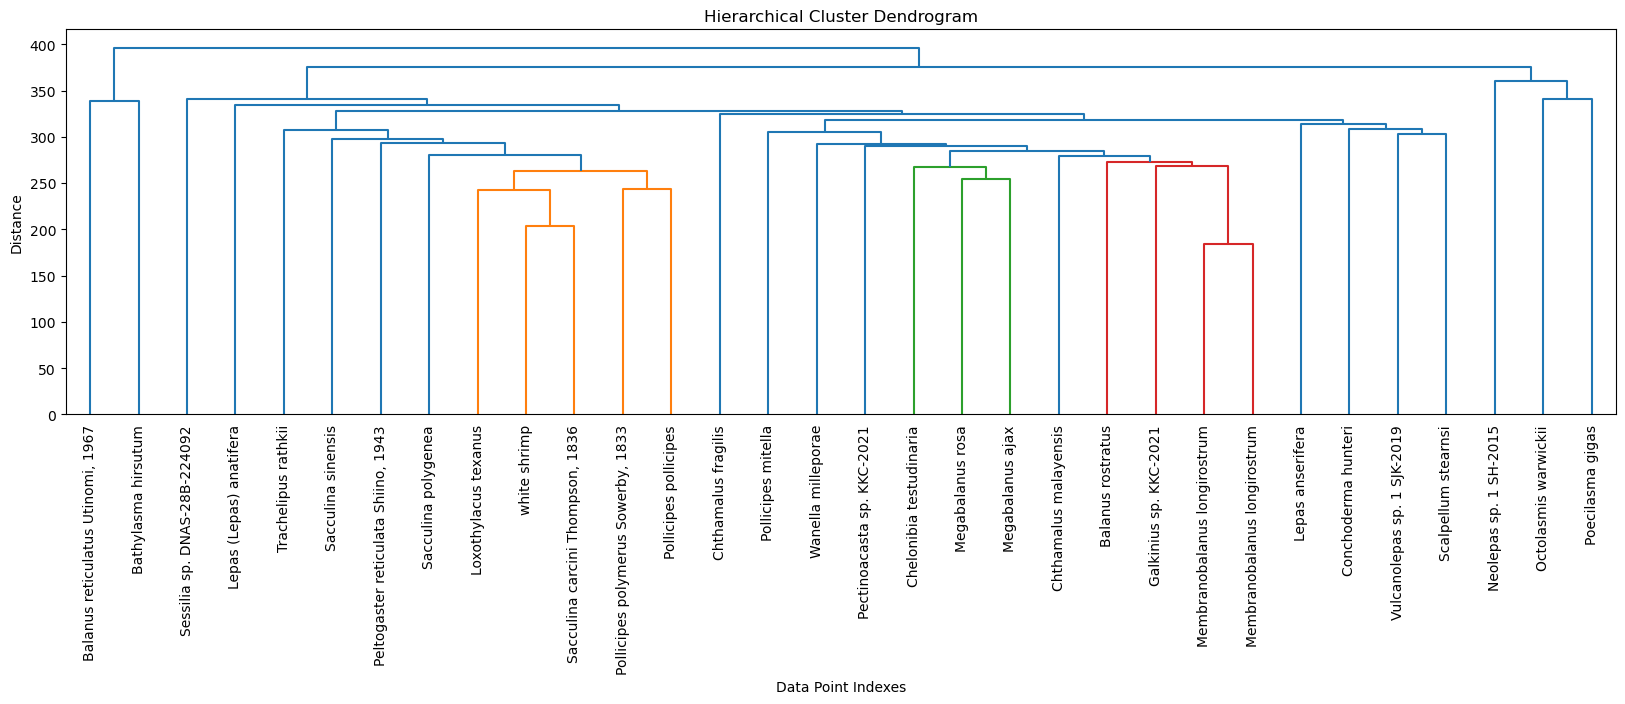

In [486]:
plt.figure(figsize=(20, 5))
dendrogram(Z, labels=df.index.tolist(), leaf_font_size=10, leaf_rotation=90)
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Data Point Indexes')
plt.ylabel('Distance')
plt.show()

In [487]:
from skbio.stats.distance import permanova

from skbio.stats.distance import DistanceMatrix, DissimilarityMatrix

dist_mat = DistanceMatrix(dist_mat)

dist_mat

In [488]:
permanova(dist_mat, list(viromeDF_relative_clr["infraclass"])) ## permanova test on frequency data

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  3
test statistic             1.052156
p-value                       0.289
number of permutations          999
Name: PERMANOVA results, dtype: object

In [489]:
viromeDF_presence =(viromeDF_relative > 0).astype(int)
dist_mat = pdist(viromeDF_presence.values)
dist_mat1 = DistanceMatrix(dist_mat)
permanova(dist_mat1, list(viromeDF_relative_clr["infraclass"])) ## permanova test on frequency data

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  3
test statistic             1.071929
p-value                       0.273
number of permutations          999
Name: PERMANOVA results, dtype: object

In [490]:
## test permanova with dissimilarity distance matrix

diss_mat = DissimilarityMatrix(dist_mat)
diss_mat1 = DistanceMatrix(diss_mat)
permanova(diss_mat1, list(viromeDF_relative_clr["infraclass"])) ## permanova test on frequency data

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  3
test statistic             1.071929
p-value                       0.264
number of permutations          999
Name: PERMANOVA results, dtype: object

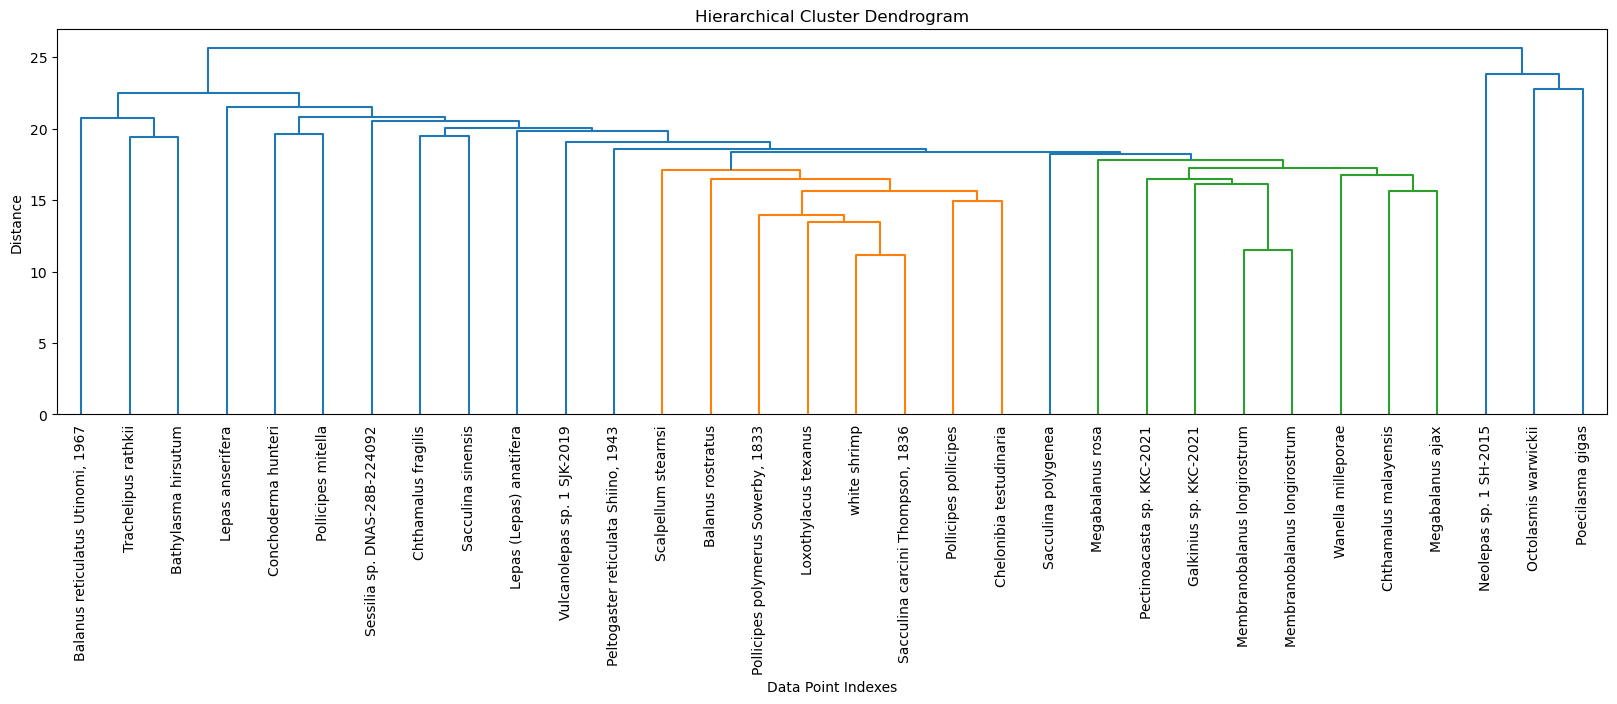

In [491]:
Z = linkage(dist_mat, method='complete', optimal_ordering=False)
plt.figure(figsize=(20, 5))
dendrogram(Z, labels=df.index.tolist(), leaf_font_size=10, leaf_rotation=90)
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Data Point Indexes')
plt.ylabel('Distance')
plt.show()

In [492]:
viromeDF_presence.insert(0, 'infraclass', viromeDF_relative_clr["infraclass"])

In [493]:
viromeDF_presence

,infraclass,Whispovirus,Emdodecavirus,Capripoxvirus,Elanorvirus,Immutovirus,Heverleevirus,Rockvillevirus,Soymovirus,Phaeovirus,...,Longwoodvirus,Corgivirus,Foetvirus,Faunusvirus,Metaavulavirus,Duonihilunusvirus,Sholavirus,Babuvirus,Felispumavirus,total_viral_reads
1,Rhizocephala,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,Thoracica,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Thoracica,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,Thoracica,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7,NaN,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,Thoracica,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,Thoracica,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
10,Thoracica,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11,NaN,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12,Thoracica,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
